In [65]:
import numpy as np
import math
import random
from matplotlib import pyplot
from collections import OrderedDict

class NeuralNet:
    
    def __init__(self, layer_size_list, learning_rate, lambda_L1norm):
        self.layer_size_list = layer_size_list # 各層のユニット数をリストで入力
        self.learning_rate = learning_rate
        self.lambda_L1norm = lambda_L1norm # Lasso
        self.length = len(self.layer_size_list) # 層数
        
        self.__init_params()
        
        self.layer_output = OrderedDict() # 出力を保存しておく辞書
        self.layer_delta = OrderedDict() # 更新量を保存しておく辞書
        
    def __init_params(self):
        self.layer_weight = OrderedDict() # 重みパラメータを保存しておく辞書
        self.layer_bias = OrderedDict() # バイアスを保存しておく辞書
        for i in range(1, self.length):
            self.layer_weight[i] = np.random.randn(self.layer_size_list[i-1], self.layer_size_list[i])
            self.layer_bias[i] = np.zeros((1, self.layer_size_list[i]))
            
    def train(self, X, T, epoch):
        self.error = np.zeros(epoch)
        N = X.shape[0]
        
        for epo in range(epoch):
            self.__update_weight(X, T)
            self.error[epo] = self.__calc_error(X, T)

    def predict(self, X, T):
        N = X.shape[0]
        Y = np.zeros((N, T.shape[1]))
        SOP1 = np.zeros((N, T.shape[1])) # second_output1 __contour_lines_showで使用
        SOP2 = np.zeros((N, T.shape[1])) # second_output2 __contour_lines_showで使用
        
        for i in range(N):
            x = X[i, :].reshape(1, -1)
            self.__forward(x)
            SOP1[i] = self.layer_output[2][0][0]
            SOP2[i] = self.layer_output[2][0][1]
            Y[i] = self.layer_output[self.length]
        return SOP1, SOP2, Y
    
    def result_show(self, n, item_list, interval, X, T, layer_num=2): # interval：contour_matrixを作るときの間隔
        weight_graphes = self.layer_weight[n].shape[1] # 表示するweightのグラフの数
        total_graphes = weight_graphes + len(item_list) + 1 # 表示する全グラフの総数。+1は、error_graphの数
        
        self.__error_graph()
        self.__weight_graph(n, total_graphes, weight_graphes)
        self.__contour_lines_show(item_list, interval, X, T, layer_num)


    # プライベートメソッド
        
    # trainで使用    
    
    def __update_weight(self, X, T):
        weight_delta = OrderedDict()
        bias_delta = OrderedDict()
        for m in range(1, self.length):
            weight_delta[m] = np.zeros((self.layer_size_list[m-1], self.layer_size_list[m]))
            bias_delta[m] = np.zeros((1, self.layer_size_list[m]))

        for i in range(N):
            x = X[i, :].reshape(1, -1)
            t = T[i, :].reshape(1, -1)
            self.__forward(x)
            
            # 更新幅の計算
            self.layer_delta[self.length] = np.multiply((self.layer_output[self.length] - t), np.multiply(self.layer_output[self.length], (np.ones((1, layer_size_list[self.length-1])) - self.layer_output[self.length])))
            for j in range(self.length-1, 1, -1):
                self.layer_delta[j] = np.multiply(np.dot(self.layer_delta[j+1], self.layer_weight[j].T), np.multiply(self.layer_output[j], (np.ones((1, self.layer_size_list[j-1])) - self.layer_output[j])))
            for p in range(self.length-1, 0, -1):
                weight_delta[p] += np.dot(self.layer_output[p].T, self.layer_delta[p+1]) + self.lambda_L1norm * np.sign(self.layer_weight[p])
                bias_delta[p] += self.layer_delta[p+1]
        
        # パラメータ更新（最急降下法）
        for k in range(self.length-1, 0, -1):
            self.layer_weight[k] -= self.learning_rate * weight_delta[k]
            self.layer_bias[k] -= self.learning_rate * bias_delta[k]
            
    def __calc_error(self, X, T): # 二乗誤差
        N = X.shape[0]
        err = 0.0
        
        for i in range(N):
            x = X[i, :].reshape(1, -1)
            t = T[i, :].reshape(1, -1)
            self.__forward(x)
            err += (self.layer_output[self.length] - t).dot((self.layer_output[self.length] - t).T) / 2.0
        return err
        
    # __update_weightで使用
    
    def __forward(self, x):
        self.layer_output[1] = x        
        for i in range(2, self.length): # 最後の出力層だけ活性化関数違うことを考慮して別に計算。（今後実装）
            self.layer_output[i] = self.__sigmoid(np.dot(self.layer_output[i-1], self.layer_weight[i-1]) + self.layer_bias[i-1])
        self.layer_output[self.length] = self.__sigmoid(np.dot(self.layer_output[self.length-1], self.layer_weight[self.length-1]) + self.layer_bias[self.length-1])
        
    # __forwardで使用
        
    def __sigmoid(self, arr):
        return 1/ (1 + np.exp(-arr))
    
    # result_showで使用
    
    def __error_graph(self): # 誤差のグラフを出力
        pyplot.figure(figsize=(15, 5))
        pyplot.title("error_graph")
        pyplot.plot(np.arange(0, self.error.shape[0]), self.error)
        
    def __weight_graph(self, n, total_graphes, weight_graphes): # 第n層の重みのグラフを表示
        for i in range(1, weight_graphes+1):
            pyplot.figure(figsize = (20,5))
            x_num = np.arange(1, self.layer_weight[n].shape[0]+1)
            y_height = self.layer_weight[n][:, i-1] # 重みのi番目の列ベクトルの取り出し
            pyplot.bar(x_num, y_height, width=0.4)
            pyplot.xticks(x_num, [str(i+1) for i in range(len(x_num))])
            pyplot.grid(True)
            pyplot.title("weight" + str(n) + "_factor" + str(i))
        
        
    def __contour_lines_show(self, item_list, interval, X, T, layer_num): # 第layer_num層のユニットと出力の関係を等高線で可視化。
        for k in item_list:
            P = self.__contour_matrix(interval)
            Q = self.__any_start(P, k, layer_num)
            e = np.arange(0, 1, interval)
            f = np.arange(0, 1, interval)
            E,F = np.meshgrid(e, f)
            pyplot.figure(figsize=((10, 10)))
            cont = pyplot.contour(E, F, Q, levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
            cont.clabel(fmt='%1.1f', fontsize=14)
            pyplot.gca().set_aspect('equal')
            SOP1, SOP2, Y = self.predict(X, T)
            pyplot.scatter(SOP2, SOP1, s=50, c=Y, cmap='Reds', label='data_output', marker='x')
            pyplot.colorbar()
            
    # __contour_lines_showで使用        
    
    def __contour_matrix(self, interval):# モデルに等間隔の値を入れて、等高線の出力のベースを作るための行列を作る。
        n = int(1.0 / interval)
        N = n * n
        Y = np.zeros((N,2))
        count = 0
        for i in range(n):
            a = i * interval
            for j in range(n):
                b = j * interval
                Y[count][0] = a
                Y[count][1] = b
                count += 1
        return Y
    

    def __any_start(self, X, k, layer_num): # 第layer_num層以降をモデルとして使用する。k番目の出力を行列で返す。
        N = X.shape[0]
        n = int(math.sqrt(N))
        Y = np.ones((n, n))
        a = 0
        
        for i in range(0,N):
            x = X[i,:].reshape(1, -1)
            self.layer_output[layer_num] = x
            for j in range(layer_num+1, self.length): # 最後の出力層だけ活性化関数違うことを考慮して別に計算。（今後実装）
                self.layer_output[j] = self.__sigmoid(np.dot(self.layer_output[j-1], self.layer_weight[j-1]) + self.layer_bias[j-1])
            self.layer_output[self.length] = self.__sigmoid(np.dot(self.layer_output[self.length-1], self.layer_weight[self.length-1]) + self.layer_bias[self.length-1])
            b = i % n
            Y[a][b] = self.layer_output[self.length][0][k-1]
            if (i+1) % n == 0:
                a += 1
        return Y

In [70]:
# エクセル形式のデータを取得し、前処理をする。

import xlrd
from sklearn.preprocessing import MinMaxScaler

wb = xlrd.open_workbook('setaibetu.xls')
sheet = wb.sheet_by_name('1-1二人以上の世帯')

def get_list_2d_all(xl_sheet):
    return [xl_sheet.row_values(row) for row in range(xl_sheet.nrows)]

setaibetu_all = get_list_2d_all(sheet)
setaibetu_matrix = np.array(setaibetu_all).T
automobile_cost = np.array(setaibetu_matrix[1:53, 73], dtype=float)

data = setaibetu_matrix[1:,1:]
data = np.array(data, dtype = float)

ms = MinMaxScaler()
data_norm = ms.fit_transform(data)

setaibetu_matrix[1:,1:] = data_norm # 正規化後のデータ

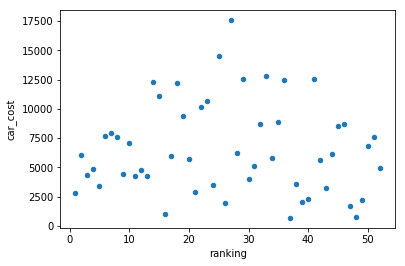

In [67]:
# 散布図表示 横軸：各都市の都会度ランキング 縦軸：自動車等購入費（各都市の各家庭の月平均）
import pandas as pd

prefectures_matrix = setaibetu_matrix[1:53, 0]
prefectures_rank_self = [9,35,32,18,36,37,34,22,23,21,10,12,1,2,3,11,33,39,19,38,26,20,27,\
                        17,16,6,25,24,13,4,5,15,14,40,42,43,41,28,44,49,50,51,48,7,8,47,29,30,45,46,31,52]
prefectures_rank_data = [17,49,37,16,44,46,34,19,28,35,8,7,1,2,3,4,29,31,45,40,24,23,22,26,27,12,20,\
                        13,11,5,6,10,9,21,41,50,32,18,36,48,25,39,43,14,15,33,30,47,42,51,38,52]

df = pd.DataFrame({'car_cost': automobile_cost,
                   'ranking': prefectures_rank_data,
                   'prefecture': prefectures_matrix}, 
                   columns=['prefecture', 'ranking', 'car_cost'])
df.plot.scatter(x='ranking',y='car_cost')

CPU times: user 35.5 s, sys: 157 ms, total: 35.7 s
Wall time: 35.9 s


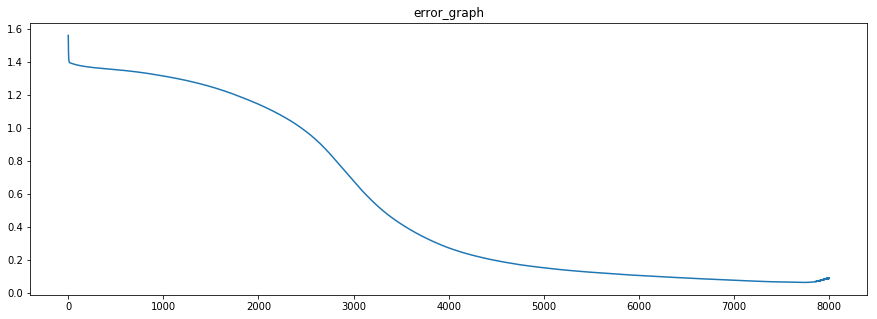

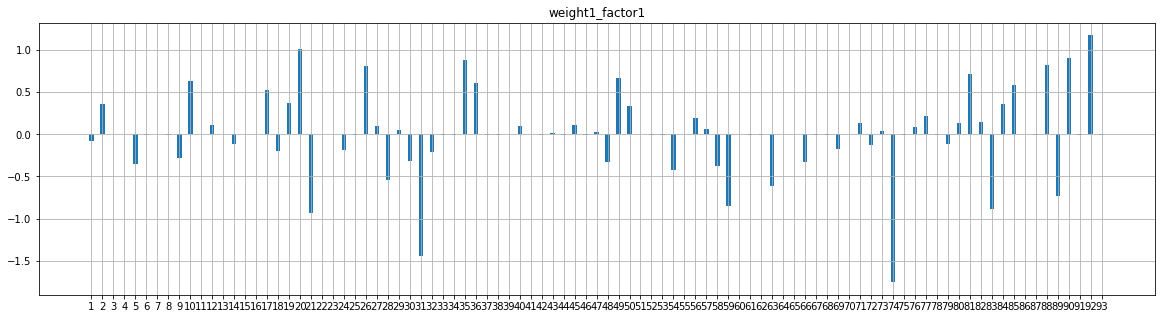

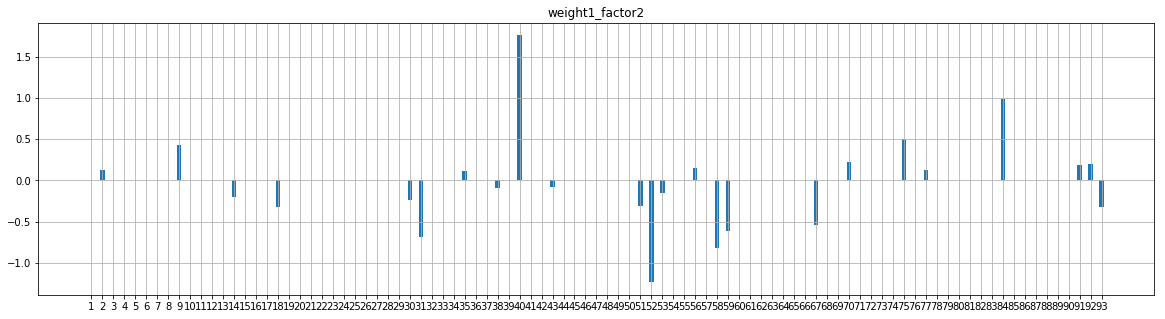

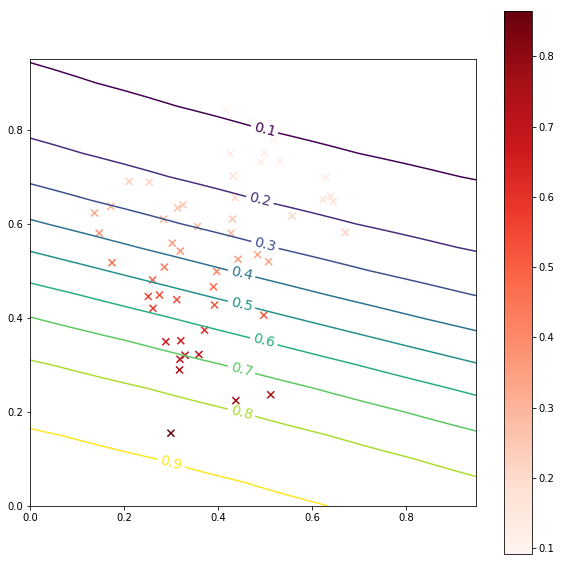

In [69]:
%%time
%matplotlib inline

# メインプログラム

import pprint
import pandas as pd

# 訓練データとテストデータに分割
X = np.array(np.hstack((setaibetu_matrix[1:,1:73], setaibetu_matrix[1:,74:])), dtype = float)
T = np.array(setaibetu_matrix[1:,73:74], dtype= float)

input_size = X.shape[1]
output_size = T.shape[1]

layer_size_list = [input_size, 2, 10, output_size] # 各層のユニット数をリストで入力
learning_rate = 0.02
lambda_L1norm = 0.00015
epoch = 8000

for _ in range(1):
    nn = NeuralNet(layer_size_list, learning_rate, lambda_L1norm)
    nn.train(X, T, epoch)

    n = 1 # 表示したい重みの層の番号
    interval = 0.05
    item_list = [1] # 出力したい項目の番号のリスト

    nn.result_show(n, item_list, interval, X, T, layer_num=2)